In [1]:
# imports cell
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

2024-08-07 16:06:38.506430: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 16:06:38.537768: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 16:06:38.582651: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 16:06:38.583083: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 16:06:39.260600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
image_path = "/home/elahed/users/elahe/segmentation/segment/cam/"
mask_path = "/home/elahed/users/elahe/segmentation/segment/label_masks/"
image_path


'/home/elahed/users/elahe/segmentation/segment/cam/'

In [3]:

def list_image_paths(directory):
    image_paths = []
    image_filenames = os.listdir(directory)
    for image_filename in image_filenames:
        image_paths.append(directory + image_filename)
    return image_paths


In [4]:
image_list = list_image_paths(image_path)
mask_list = list_image_paths(mask_path)

image_list

['/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-28-08_00052428.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-26-22_00046769.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-25-14_00042652.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-17-41_00018407.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-35-36_00076624.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-29-44_00057601.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-42-37_00099001.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-20-15_00026664.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-32-48_00067970.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-36-57_00080778.png',
 '/home/elahed/users/elahe/segmentation/segment/cam/image_2024-08-08-13-51_00005804.png',
 '/home/el

In [5]:
labels = {'Unlabeled': 0,
          'Building': 1,
          'Fence': 2,
          'Other': 3,
          'Pedestrian': 4,
          'Pole': 5,
          'Roadline': 6,
          'Road': 7,
          'Sidewalk': 8,
          'Vegetation': 9,
          'Car': 10,
          'Wall': 11,
          'Traffic sign': 12,
          'Sky': 13,
          'Ground': 14,
          'Bridge': 15,
          'RailTrack': 16,
          'GuardRail': 17,
          'TrafficLight': 18,
          'Static': 19,
          'Dynamic': 20,
          'Water': 21,
          'Terrain': 22,
          }

colors_platte = np.array([[0, 0, 0],  # Unlabeled
                           [70, 70, 70],  # Building
                           [100, 40, 40],  # Fence
                           [55, 90, 80],  # Other -> Everything that does not belong to any other category.
                           [220, 20, 60],  # Pedestrian
                           [153, 153, 153],  # Pole
                           [157, 234, 50],  # Roadline
                           [128, 64, 128],  # Road
                           [244, 35, 232],  # Sidewalk
                           [107, 142, 35],  # Vegetation
                           [0, 0, 142],  # Car
                           [102, 102, 156],  # Wall
                           [220, 220, 0],  # Traffic sign
                           # not used in current model
                           [70, 130, 180],  # Sky
                           [81, 0, 81],  # Ground
                           [150, 100, 100],  # Bridge
                           [230, 150, 140],  # RailTrack
                           [180, 165, 180],  # GuardRail
                           [250, 170, 30],  # TrafficLight
                           [110, 190, 160],  # Static
                           [170, 120, 50],  # Dynamic
                           [45, 60, 150],  # Water
                           [145, 170, 100]])# Terrain

In [6]:
#IMG_HEIGHT = 600
#IMG_WIDTH = 800

RESIZE_HEIGHT = 256
RESIZE_WIDTH = 256

BATCH_SIZE = 8


((720, 1280, 3), (720, 1280, 3))

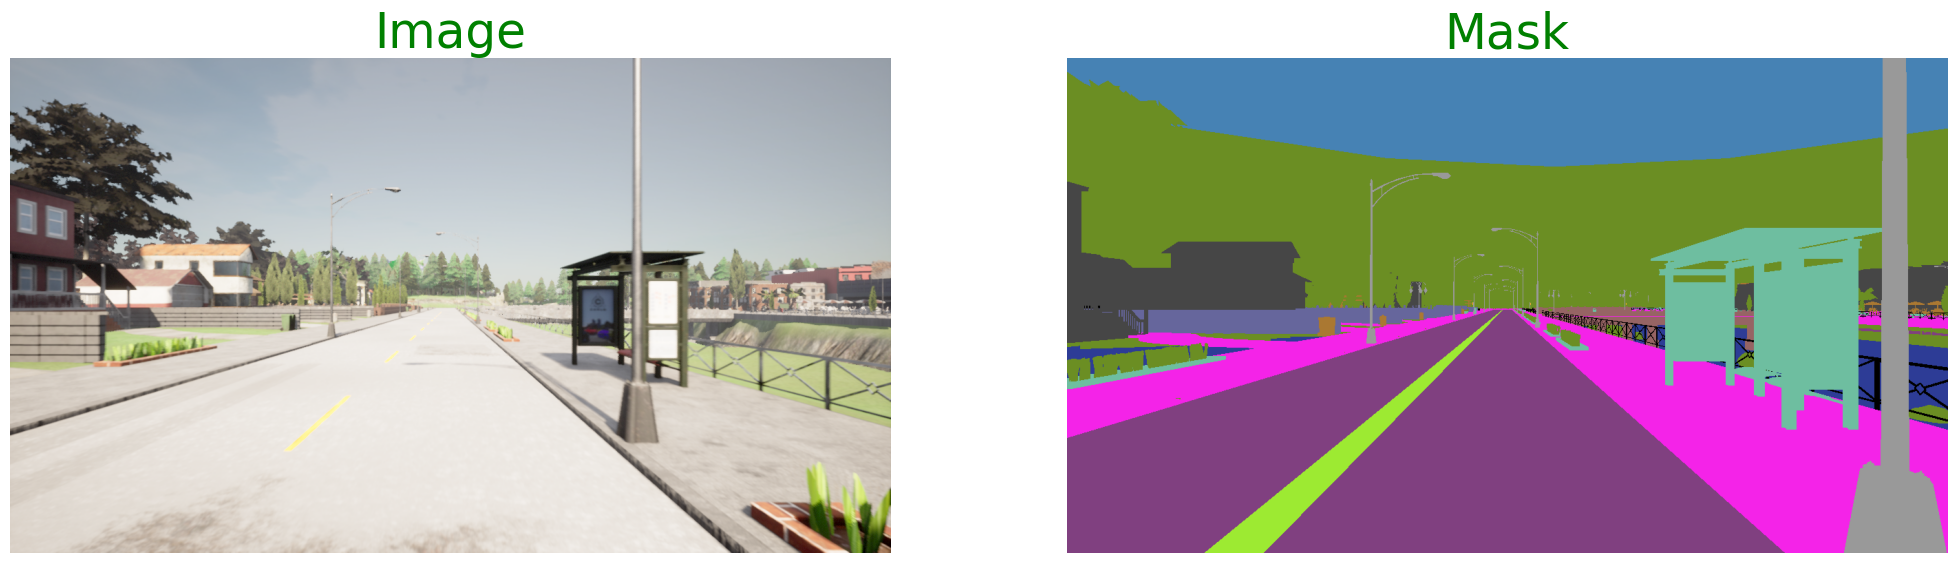

In [7]:
img = cv2.cvtColor(cv2.imread(image_list[0]), cv2.COLOR_BGR2RGB)

msk = cv2.imread(mask_list[0])
#msk = cv2.imread(mask_list[0], cv2.IMREAD_GRAYSCALE)
#print(msk.shape)
msk = np.max(msk, axis=-1)
#print(msk.shape)
msk = colors_platte[msk]
fig, arr = plt.subplots(1, 2, figsize=(25, 25))

arr[0].set_title('Image', color="green", fontsize=35)
arr[0].imshow(img)
arr[0].axis("off")

arr[1].set_title('Mask', color="green", fontsize=35)
arr[1].imshow(msk)
arr[1].axis("off")

img.shape, msk.shape

In [8]:
image_list = list_image_paths(image_path)
mask_list 

['/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-28-08_00052428.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-26-22_00046769.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-25-14_00042652.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-17-41_00018407.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-35-36_00076624.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-29-44_00057601.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-42-37_00099001.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-20-15_00026664.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-32-48_00067970.png',
 '/home/elahed/users/elahe/segmentation/segment/label_masks/image_2024-08-08-36-57_00080778.png',
 '/home/elahed/users

In [9]:
x_train_val, x_test, y_train_val, y_test = train_test_split(image_list, mask_list, test_size=0.2,
                                                            random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import Sequence
import cv2

class CustomDataSequence(Sequence):
    def __init__(self, image_list, mask_list, batch_size, image_size=(256, 256), transform=None):
        self.image_list = image_list
        self.mask_list = mask_list
        self.batch_size = batch_size
        self.image_size = image_size
        self.transform = transform

    def __len__(self):
        return int(np.ceil(len(self.image_list) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.image_list[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.mask_list[idx * self.batch_size:(idx + 1) * self.batch_size]
        images = np.array([self.read_and_preprocess_image(file_name) for file_name in batch_x])
        masks = np.array([self.read_and_preprocess_mask(file_name) for file_name in batch_y])
        return images, masks

    def read_and_preprocess_image(self, file_path):
        image = cv2.imread(file_path)
        image = cv2.resize(image, self.image_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255.0  # Normalize to [0, 1]
        return image

    def read_and_preprocess_mask(self, file_path):
        msk = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
        msk = cv2.resize(msk, (256, 256))
        msk = np.max(msk, axis=-1)
        return msk

In [11]:
batch_size = 16
train_dataloader = CustomDataSequence(x_train, y_train, batch_size)
val_dataloader = CustomDataSequence(x_val, y_val, batch_size)
test_dataloader = CustomDataSequence(x_test, y_test, batch_size)

In [12]:
def conv_block(input_tensor, num_filters, use_dropout=False, dropout_prob=0.3):
    x = layers.Conv2D(num_filters, (3, 3), padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(num_filters, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    if use_dropout:
        x = layers.Dropout(dropout_prob)(x)
    return x

def encoder_block(input_tensor, num_filters, dropout_prob=0.0, max_pooling=True):
    conv = conv_block(input_tensor, num_filters, use_dropout=dropout_prob > 0.0, dropout_prob=dropout_prob)
    if max_pooling:
        p = layers.MaxPooling2D((2, 2), strides=2)(conv)
        return conv, p
    else:
        return conv, conv

def decoder_block(input_tensor, concat_tensor, num_filters):
    x = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    x = layers.concatenate([x, concat_tensor])
    x = conv_block(x, num_filters)
    return x

def unet_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    s5, p5 = encoder_block(p4, 1024, dropout_prob=0.3, max_pooling=False)

    # Decoder
    d1 = decoder_block(s5, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(d4)

    model = models.Model(inputs, outputs)
    return model

# Example usage
input_shape = (256, 256, 3)  # Change according to your dataset
num_classes = 23  # Change according to your dataset
model = unet_model(input_shape, num_classes)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

model.summary()


2024-08-07 16:06:59.575569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-07 16:06:59.576543: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1728      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 256, 256, 64)         0         ['batch_normalization[0][0

In [16]:
# Assuming `train_sequence` and `test_sequence` are already defined and `model` is instantiated
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

num_epochs = 1


# Callbacks for saving the best model and early stopping
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_unet_model.h5", save_best_only=True, monitor="val_loss"),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)#,
    #EpochProgressBar(num_epochs=num_epochs)
]

# Using model.fit for training with validation data and callbacks
history = model.fit(train_dataloader, epochs=num_epochs, validation_data=val_dataloader, callbacks=callbacks)



214/214 [==============================] - 2614s 12s/step - loss: 0.3529 - sparse_categorical_accuracy: 0.8997 - val_loss: 1.7652 - val_sparse_categorical_accuracy: 0.7358


In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataloader)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

72/72 [==============================] - 166s 2s/step - loss: 1.7633 - sparse_categorical_accuracy: 0.7366
Test Loss: 1.7632790803909302, Test Accuracy: 0.7365802526473999


## Test the model

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = tf.convert_to_tensor(image, dtype=tf.float32)  # Convert to tensor
    predicted = model.predict(image)
    predicted= tf.argmax(predicted, axis=-1)
    predicted = tf.squeeze(predicted).numpy()
    predicted_mask = colors_platte[predicted]
    return predicted_mask,predicted

In [25]:
image_test_path = '/home/elahed/users/elahe/segmentation/test_image.png'
image_test = cv2.imread(image_test_path)
image_test = cv2.resize(image_test, (256,256))
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
image_test = image_test / 255.0  # Normalize to [0, 1]
pred_msk,pred  = predict(model,image_test)

1/1 [==============================] - 0s 173ms/step
